In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# 0.
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
# a)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# b)     
total_bill = tips["total_bill"]
tip = tips["tip"]
size = tips["size"]
tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

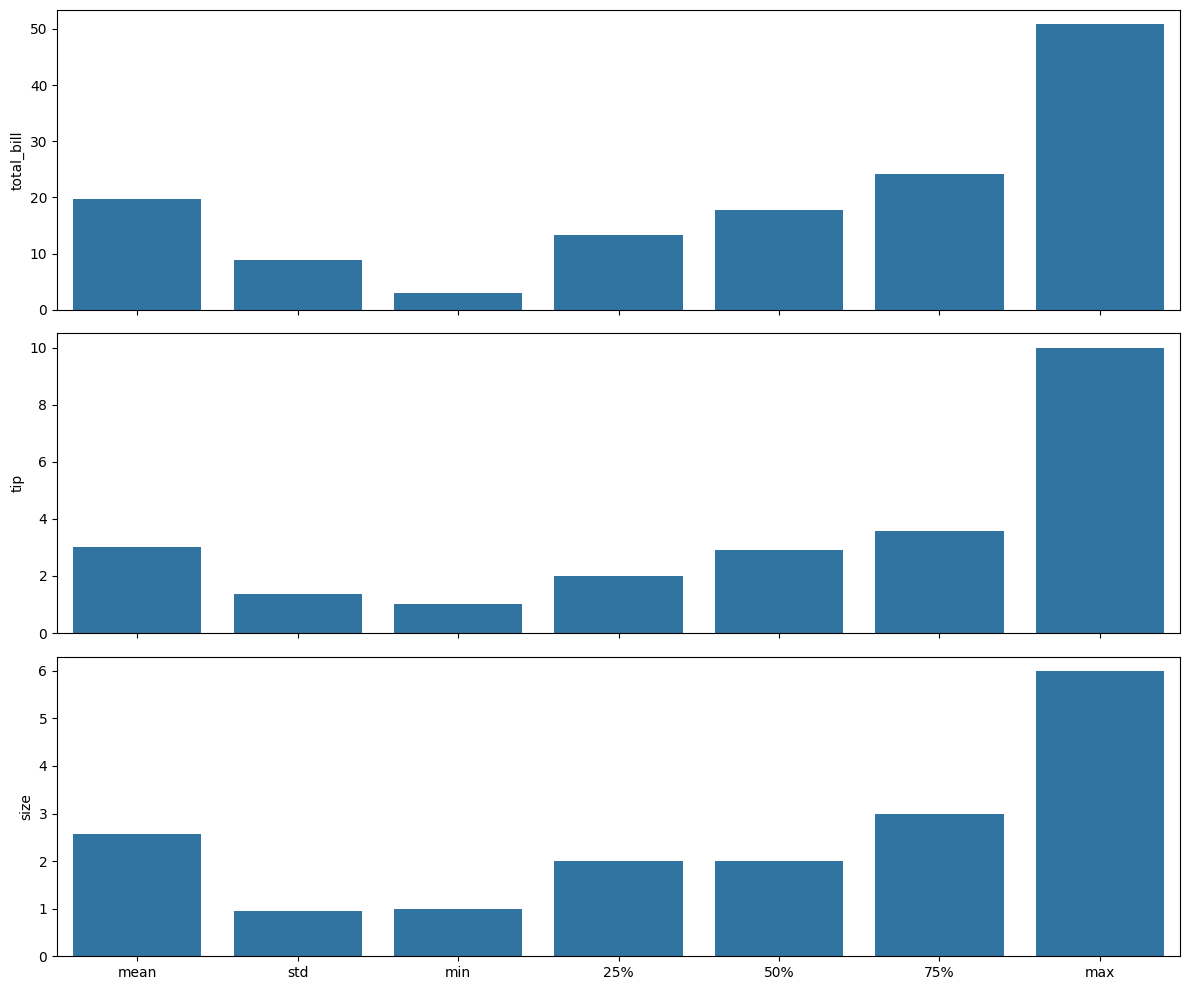

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=len(["total_bill", "tip", "size"]), ncols=1, figsize=(12, 10), sharex=True)

# define what stats to display
stats_to_display = ["mean", "std", "min", "25%", "50%", "75%", "max"]

# iterate over relevant numerical columns
for i, column in enumerate(["total_bill", "tip", "size"]):
    stats_values = [tips[column].mean(), tips[column].std(), tips[column].min(),
                    tips[column].quantile(0.25), tips[column].quantile(0.50),
                    tips[column].quantile(0.75), tips[column].max()]
    sns.barplot(x=stats_to_display, y=stats_values, ax=axes[i])
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

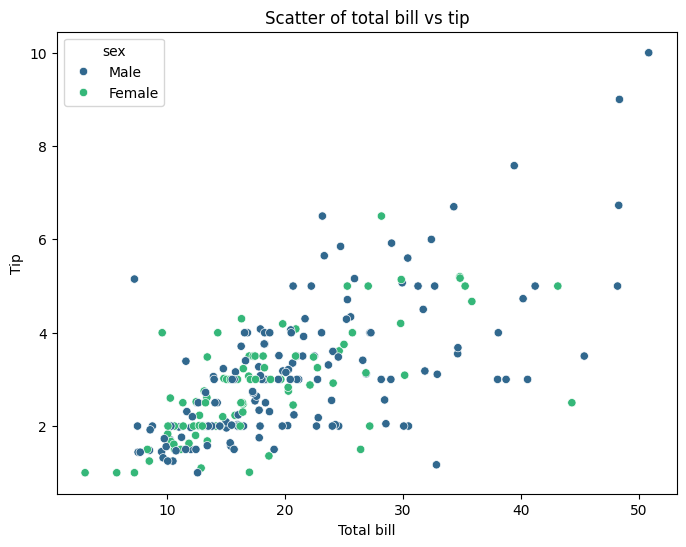

In [7]:
# c)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', palette='viridis')
plt.title('Scatter of total bill vs tip')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

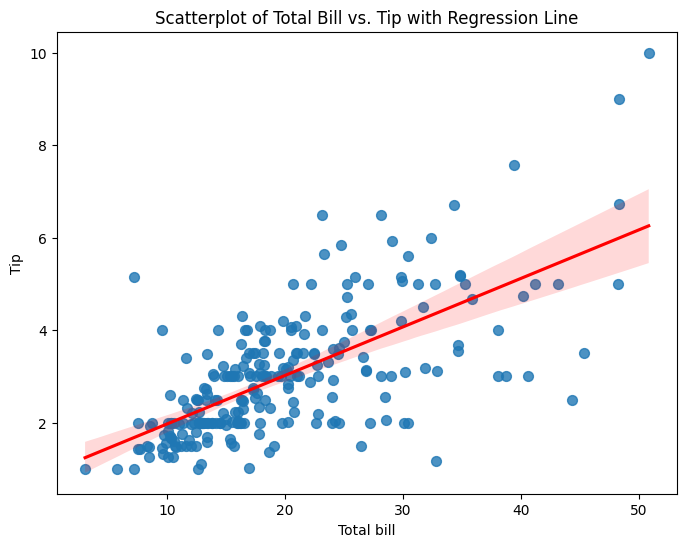

In [8]:
# c)
plt.figure(figsize=(8,6))
sns.regplot(data=tips, x='total_bill', y='tip', scatter_kws={'s':50}, line_kws={'color': 'red'})
plt.title('Scatterplot of Total Bill vs. Tip with Regression Line')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

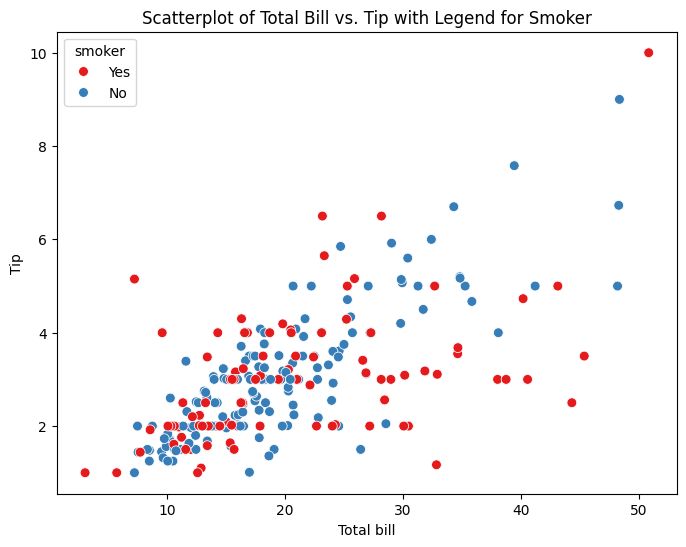

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', palette='Set1', s=50)
plt.title('Scatterplot of Total Bill vs. Tip with Legend for Smoker')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

In [10]:
# 1. Train|test split
from sklearn.model_selection import train_test_split

X = tips[["total_bill", "size"]]
y = tips["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (170, 2)
X_test shape: (74, 2)
y_train shape: (170,)
y_test shape: (74,)


In [11]:
# 2. Feature standardization
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"scaled_X_train mean: {scaled_X_train.mean(axis=0)}")
print(f"scaled_X_train std: {scaled_X_train.std(axis=0)}")      
print(f"Scaled X_test mean: {scaled_X_test.mean(axis=0)}")
print(f"scaled_X_test std: {scaled_X_test.std(axis=0)}")

scaled_X_train mean: [ 6.79195262e-17 -1.04491579e-16]
scaled_X_train std: [1. 1.]
Scaled X_test mean: [-0.19194537 -0.04491163]
scaled_X_test std: [0.92139976 1.06228803]


In [12]:
# 3. Polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False)
# Fit and transform X_train
X_train_poly = polynomial_instance.fit_transform(X_train)
# Fit and transform X_test
X_test_poly = polynomial_instance.fit_transform(X_test)
## Transform X_test
X_test_poly_transformed = polynomial_instance.transform(X_test)
X_test_poly_transformed = polynomial_instance.transform(X_test)

# fit & transform X_test separately
polynomial_instance_test = PolynomialFeatures(degree=2, include_bias=False)
X_test_poly_fitted = polynomial_instance_test.fit_transform(X_test)

# Compare the transformed features using the equality operator
are_equal = np.sum((X_test_poly_transformed == X_test_poly_fitted) == len(X_test_poly_transformed))

print("Original X_train shape:", X_train.shape)
print("Transformed X_train shape:", X_train_poly.shape)

print("\nOriginal X_test shape:", X_test.shape)
print("Transformed X_test shape:", X_test_poly.shape)

print("Are the transformed features equal?", are_equal)

Original X_train shape: (170, 2)
Transformed X_train shape: (170, 5)

Original X_test shape: (74, 2)
Transformed X_test shape: (74, 5)
Are the transformed features equal? 0


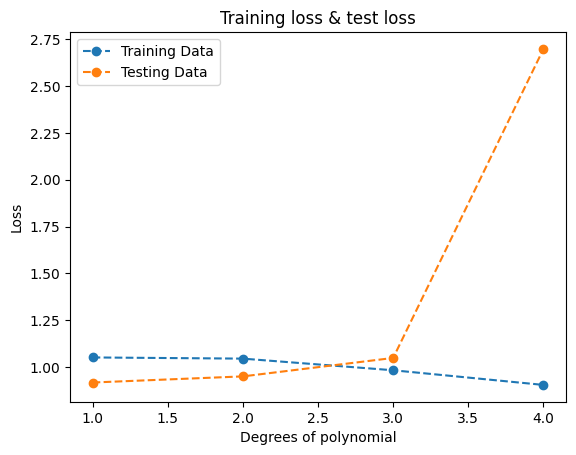

In [18]:
# 4. Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

rmse_train_list = []
rmse_test_list = []

for degree in range(1, 5):
    # Initiate PolynomialFeatures with current degree
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
     # Fit and transform X_train to create polynomial features
    X_train_poly = poly_features.fit_transform(X_train)
    # Transform X_test using the same instance to create consistent features
    X_test_poly = poly_features.transform(X_test)
    # Instantiate Linear Regression model
    model = LinearRegression()
    # Fit the model on the polynomial features
    model.fit(X_train_poly, y_train)
    # Make predictions on the training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    # Calculate and print the Mean Squared Error (MSE) for training and testing data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    # Calculate RMSE for training and testing data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    # Append RMSE values to the lists
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)

# Plot the results
plt.plot(range(1, 5), rmse_train_list, 'o--', label='Training Data')
plt.plot(range(1, 5), rmse_test_list, 'o--', label='Testing Data')
plt.xlabel("Degrees of polynomial")
plt.ylabel("Loss")
plt.title("Training loss & test loss")
plt.legend()
plt.show()


In [25]:
# 5. Regularization methods
# a)
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

degree = 4
# Specify alpha values for cross-validation
alphas = [0.01, 0.1, 0.5, 1, 5, 10]
# Instantiate RidgeCV with cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)
# Fit the model on the polynomial features
ridge_cv.fit(X_train_poly, y_train)
# Chech the best alpha chosen by cross-validation
best_alpha = ridge_cv.alpha_
print(f"Best alpha chosen by CV: {best_alpha}")
# Check the weights of the model
weights = ridge_cv.coef_
print(f"Weights of the model: {weights}")

# Make predictions on the testing data
y_test_pred = ridge_cv.predict(X_test_poly)

# Calculate MAE, MSE, RMSE for testing data
MAE_test = mean_absolute_error(y_test, y_test_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
RMSE_test = np.sqrt(MSE_test)

print(f"MAE on testing data: {MAE_test}")
print(f"MSE on testing data: {MSE_test}")
print(f"RMSE on testing data: {RMSE_test}")

Best alpha chosen by CV: 10.0
Weights of the model: [-2.92658869e-01  1.51664183e-02  4.26321510e-02  1.08526493e-02
  9.00569237e-02 -1.84831590e-03  7.06367192e-03 -6.43727291e-02
  1.15531226e-01  3.38638894e-05 -5.62512356e-04  6.83387897e-03
 -3.17731595e-02  5.62290251e-02]
MAE on testing data: 0.8320454040707144
MSE on testing data: 2.5436496731321414
RMSE on testing data: 1.5948823383347568


c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.06979e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [24]:
# b)
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

degree = 4
n_alphas = 100

# Instantiate LassoCV with cross-validation
lasso_cv = LassoCV(n_alphas=n_alphas, max_iter=1000, cv=5)

# Fit the model on the polynomial features
lasso_cv.fit(X_train_poly, y_train)

# Check the best alpha chosen by CV
best_alpha = lasso_cv.alpha_
print(f"Best alpha chosen by cross-validation: {best_alpha}")

# Check the weights of the model
weights = lasso_cv.coef_
print(f"Weights: {weights}")

# Make predictions on the testing data
y_test_pred = lasso_cv.predict(X_test_poly)

# Calculate MAE, MSE, RMSE for testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"MAE on testing data: {mae_test}")
print(f"MSE on testing data: {mse_test}")
print(f"RMSE on testing data: {rmse_test}")

Best alpha chosen by cross-validation: 3466.812242772002
Weights: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.89277290e-08 1.15689483e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MAE on testing data: 0.8744681514535776
MSE on testing data: 1.3362190536730938
RMSE on testing data: 1.1559494165719768


In [31]:
# c)
from sklearn.linear_model import ElasticNetCV
degree = 4
n_alphas = 100

model_elastic = ElasticNetCV(l1_ratio=[.001, .01, .05, .1, .5, .9, .95, 1], max_iter=1000, eps = 0.001, n_alphas = 100)
model_elastic.fit(X_train_poly, y_train)

# Best l1 ratio
best_l1 = model_elastic.l1_ratio_
print(f"Best L1 ratio: {best_l1}") # this would remove ridge and pick Lasso regression entirely

# Best alphaa
best_alpha_elastic = model_elastic.alpha_
print(f"Best alpha: {best_alpha_elastic}")

weights_elastic = model_elastic.coef_
print(f"Weights: {weights_elastic}")

# Make predictions on the testing data
y_test_pred = model_elastic.predict(X_test_poly)

# MAE, MSE, RMSE
mae_elastic = mean_absolute_error(y_test, y_test_pred)
mse_elastic = mean_squared_error(y_test, y_test_pred)
rmse_elastic = np.sqrt(mse_elastic)

print(f"MAE on testing data: {mae_elastic}")
print(f"MSE on testing data: {mse_elastic}")
print(f"RMSE on testing data: {rmse_elastic}")

Best L1 ratio: 0.001
Best alpha: 3233160.7006248906
Weights: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.18256924e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MAE on testing data: 0.8754139229497432
MSE on testing data: 1.3471779996262916
RMSE on testing data: 1.160679972958219
